# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

What is the customer base? Drivers' age, income level, distance travelled, family or single drivers, and ...

What are the features of most sold cars (demand)? Automatic or manual, 4 door, van, or sports car, engine, mileage, and ...

What are outlier prices? Too high or too low.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

What is inside the dataset?

Is there missing or duplicate values?

Is there outliers?

Is there categorical data or data that needs to be transformed or combined?

In [168]:
import pandas as pd
import numpy as np

In [169]:
cars_df = pd.read_csv('data/vehicles.csv')

In [170]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [171]:
cars_df['manufacturer'] = cars_df['manufacturer'].astype('string')
cars_df['model'] = cars_df['model'].astype('string')

In [172]:
cars_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [173]:
#missing values:
(cars_df.isna().mean() * 100).round(2).sort_values(ascending=False)

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
id               0.00
region           0.00
price            0.00
state            0.00
dtype: float64

In [174]:
#duplicates:
cars_df.duplicated().sum()

0

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [176]:
cars_clean = cars_df.drop({'id', 'VIN', 'region', 'model'}, axis=1)

cars_clean['type'] = cars_clean['type'].fillna('unknown_type')
cars_clean['cylinders'] = cars_clean['cylinders'].fillna('unknown_cyl')
cars_clean['condition'] = cars_clean['condition'].fillna('unknown_cond')
cars_clean['drive'] = cars_clean['drive'].fillna('unknown_drive')
cars_clean['paint_color'] = cars_clean['paint_color'].fillna('unknown_color')
cars_clean['size'] = cars_clean['paint_color'].fillna('unknown_size')
cars_clean['title_status'] = cars_clean['title_status'].fillna('unknown_title')
cars_clean['transmission'] = cars_clean['transmission'].fillna('unknown_trans')
cars_clean['fuel'] = cars_clean['fuel'].fillna('unknown_fuel')

#remove rows that have missing manufacturer and year at the same time
cars_clean = cars_clean.dropna(subset=['manufacturer', 'year'], how='all')
#remove rows that missing price
cars_clean = cars_clean[cars_clean['price'] != 0]

In [178]:
#cars_clean[cars_clean['model'].str.match('buy', case=False, na=False) & cars_clean['manufacturer'].notna()].sum()

In [180]:
cars_clean.isna().mean() * 100


price           0.000000
year            0.001018
manufacturer    3.822655
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.566932
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [181]:
#drop missing values
cars_clean.dropna(inplace=True)

(cars_clean.isna().sum() / cars_clean.isna().count()) * 100.0


price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [182]:
#duplicates:
cars_df.duplicated().sum()

0

In [183]:
#cars_clean.drop_duplicates(inplace=True)

In [184]:
cars_clean.count()

price           375619
year            375619
manufacturer    375619
condition       375619
cylinders       375619
fuel            375619
odometer        375619
title_status    375619
transmission    375619
drive           375619
size            375619
type            375619
paint_color     375619
state           375619
dtype: int64

In [185]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375619 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375619 non-null  int64  
 1   year          375619 non-null  float64
 2   manufacturer  375619 non-null  string 
 3   condition     375619 non-null  object 
 4   cylinders     375619 non-null  object 
 5   fuel          375619 non-null  object 
 6   odometer      375619 non-null  float64
 7   title_status  375619 non-null  object 
 8   transmission  375619 non-null  object 
 9   drive         375619 non-null  object 
 10  size          375619 non-null  object 
 11  type          375619 non-null  object 
 12  paint_color   375619 non-null  object 
 13  state         375619 non-null  object 
dtypes: float64(2), int64(1), object(10), string(1)
memory usage: 43.0+ MB


In [186]:
cars_clean['year'] = cars_clean['year'].astype('int')
cars_clean['fuel'] = cars_clean['fuel'].astype('string')
cars_clean['odometer'] = cars_clean['odometer'].astype('int')
cars_clean['title_status'] = cars_clean['title_status'].astype('string')
cars_clean['transmission'] = cars_clean['transmission'].astype('string')
cars_clean['state'] = cars_clean['state'].astype('string')

cars_clean['state'].str.match(r'[a-z][a-z]').sum()==cars_clean['state'].count() #check to see all states are 2 letters

True

In [187]:
cars_clean['state'] = cars_clean['state'].str.upper()

Text(0.5, 0.98, 'Year is Left Skewed')

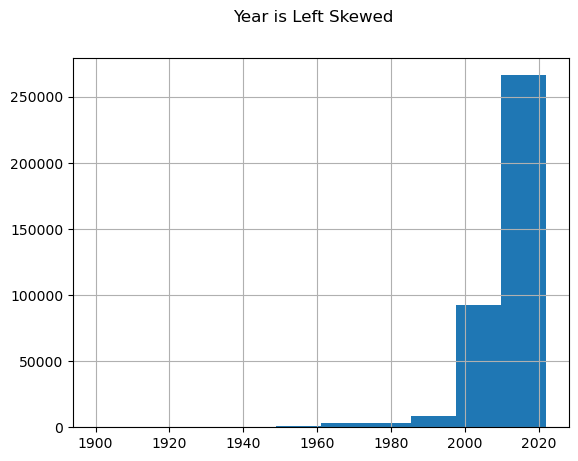

In [188]:
import pylab as pl
cars_clean['year'].hist()
pl.suptitle("Year is Left Skewed")


Text(0.5, 0.98, 'Price is Right Skewed with Outliers')

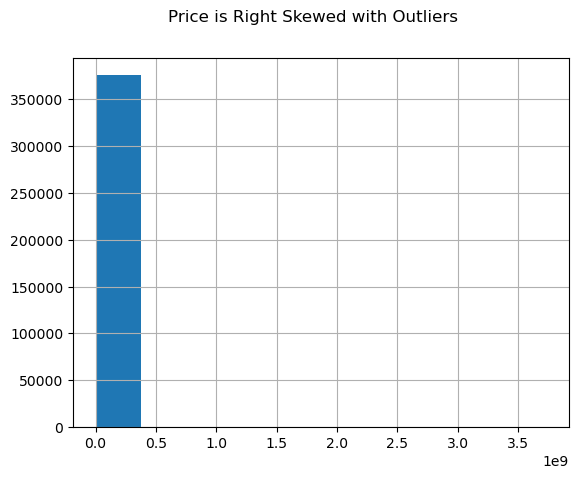

In [189]:
import seaborn as sns
#sns.displot(cars_clean['price'],bins=30,color='purple');
cars_clean['price'].hist()
pl.suptitle("Price is Right Skewed with Outliers")


Text(0.5, 0.98, 'Odometer is Right Skewed with Outliers')

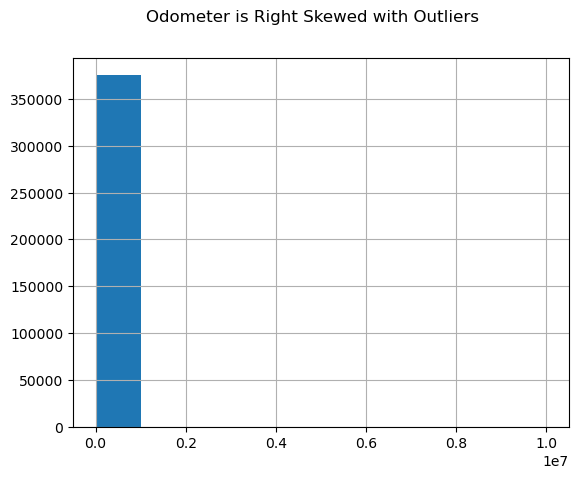

In [190]:
cars_clean['odometer'].hist()
pl.suptitle("Odometer is Right Skewed with Outliers")

In [191]:
# remove outliers...

std = cars_clean['price'].std() 
mean = cars_clean['price'].mean()

print(std, mean)

cars_clean[cars_clean['price']>150000].count()

12983816.664632505 83781.4214669652


price           136
year            136
manufacturer    136
condition       136
cylinders       136
fuel            136
odometer        136
title_status    136
transmission    136
drive           136
size            136
type            136
paint_color     136
state           136
dtype: int64

In [192]:
#standard deviation of price is too high at 13_234_267
# only 126 car above $150_000, so drop them
cars_clean = cars_clean[cars_clean['price']<=150000]

In [193]:
std = cars_clean['year'].std() 
mean = cars_clean['year'].mean()

print(std, mean)

cars_clean = cars_clean[cars_clean['year']>= mean-2*std]
cars_clean = cars_clean[cars_clean['year']<= mean+2*std]

9.106543021291875 2011.2896456031299


In [194]:
std = cars_clean['odometer'].std() 
mean = cars_clean['odometer'].mean()

print(std, mean)

cars_clean = cars_clean[cars_clean['odometer']<= mean+2*std]



136137.2714291103 95374.98032134373


C:\Users\Slytherin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Slytherin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Slytherin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Odometer: Right-Skewed after Outlier Removal')

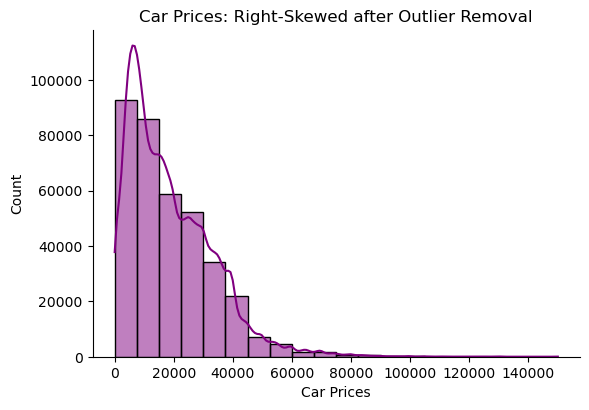

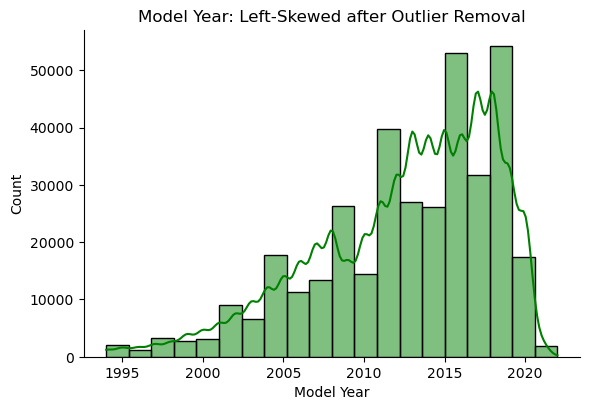

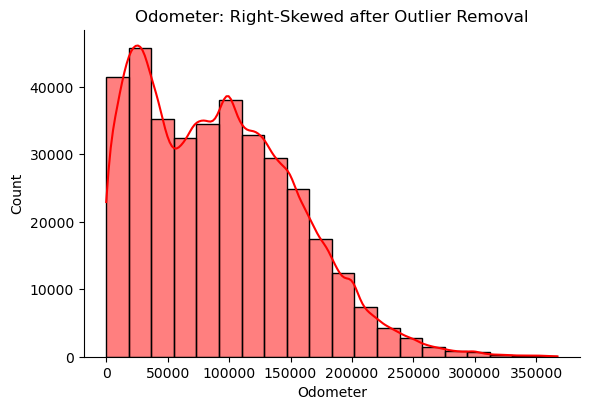

In [195]:
sns.displot(cars_clean['price'], bins=20, color='purple', kde=True, height=4, aspect=1.5)
plt.xlabel("Car Prices")
plt.title("Car Prices: Right-Skewed after Outlier Removal")

sns.displot(cars_clean['year'],bins=20,color='green', kde=True, height=4, aspect=1.5)
plt.xlabel("Model Year")
plt.title("Model Year: Left-Skewed after Outlier Removal")

sns.displot(cars_clean['odometer'],bins=20,color='red', kde=True, height=4, aspect=1.5)
plt.xlabel("Odometer")
plt.title("Odometer: Right-Skewed after Outlier Removal")


In [196]:
cars_clean.describe()

,price,year,odometer
count,362489.000000,362489.000000,362489.000000
mean,18959.783822,2012.527354,92395.729721
std,14629.989264,5.550625,62428.112220
min,1.000000,1994.000000,0.000000
25%,7499.000000,2009.000000,38360.000000
50%,15800.000000,2014.000000,87445.000000
75%,27977.000000,2017.000000,135092.000000
max,150000.000000,2022.000000,367245.000000


C:\Users\Slytherin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



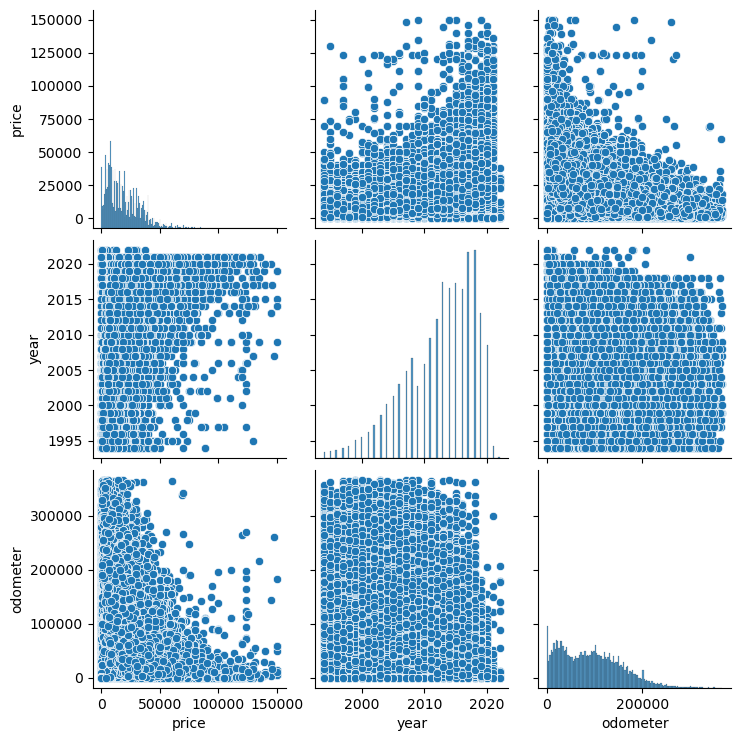

In [197]:
sns.pairplot(cars_clean)

In [198]:
corr=cars_clean.corr(numeric_only=True)

<Axes: >

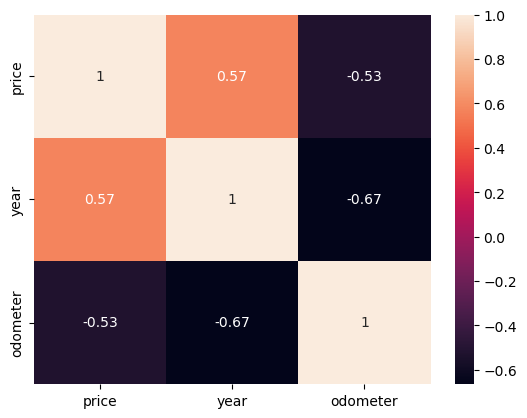

In [199]:
sns.heatmap(corr, annot=True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import plotly.express as px
import warnings


def root_mean_squared_error (y_actual, y_predicted, sq=False):
    return mean_squared_error(y_actual, y_predicted, squared=sq)

In [63]:
X = cars_clean.drop('price', axis = 1)

#drop all categorical columns to get base line error
X = X.drop(['manufacturer', 'fuel','title_status','transmission','state', 'condition', 'drive', 'type', 'cylinders', 
            'paint_color', 'size'], axis=1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [64]:
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [65]:
pipe.fit(X_train, y_train)

preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

base_train_mse = root_mean_squared_error(y_train, preds_train)
base_test_mse = root_mean_squared_error(y_test, preds_test)

In [66]:
print('Baseline Train LinReg RMSE: ', base_train_mse)
print('Baseline Test LinReg RMSE:  ', base_test_mse)

Baseline Train LinReg RMSE:  11589.546856406485
Baseline Test LinReg RMSE:   11573.66155089229


In [67]:
# encode categorized columns, normalize, scale, feature select, and linreg:

col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer', 'fuel','title_status',
                                                                               'transmission','state', 'condition', 
                                                                               'drive', 'type', 'cylinders', 'paint_color', 
                                                                               'size']), 
                                          remainder='passthrough')


pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                #('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', Lasso(alpha=0.5, tol=1e-2))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Lasso(alpha=0.5, tol=0.01))])

In [68]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

lasso_preds_train = pipe.predict(X_train)
lasso_preds_test = pipe.predict(X_test)

lasso_train_mse = root_mean_squared_error(y_train, lasso_preds_train)
lasso_test_mse = root_mean_squared_error(y_test, lasso_preds_test)

print('Train Lasso RMSE: ', lasso_train_mse)
print('Test Lasso RMSE:  ', lasso_test_mse)

Train Lasso RMSE:  8676.387783503573
Test Lasso RMSE:   8637.43399238755


In [69]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                #('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', Ridge(alpha=0.5))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.5))])

In [70]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

ridge_preds_train = pipe.predict(X_train)
ridge_preds_test = pipe.predict(X_test)

ridge_train_mse = root_mean_squared_error(y_train, ridge_preds_train)
ridge_test_mse = root_mean_squared_error(y_test, ridge_preds_test)

print('Train Ridge RMSE: ', ridge_train_mse)
print('Test Ridge RMSE:  ', ridge_test_mse)

Train Ridge RMSE:  8685.808215391724
Test Ridge RMSE:   8647.33973782296


In [71]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [72]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

linreg_preds_train = pipe.predict(X_train)
linreg_preds_test = pipe.predict(X_test)

linreg_train_mse = root_mean_squared_error(y_train, linreg_preds_train)
linreg_test_mse = root_mean_squared_error(y_test, linreg_preds_test)

print('Train LinReg RMSE: ', linreg_train_mse)
print('Test LinReg RMSE:  ', linreg_test_mse)

Train LinReg RMSE:  8679.78122915222
Test LinReg RMSE:   8641.088610333409


In [73]:
new_df = X_train.drop(['year', 'manufacturer', 'condition', 'fuel', 'odometer', 'title_status','transmission', 'drive', 'size', 
                       'type', 'paint_color', 'state', 'cylinders'], axis=1)
new_df['price'] = y_train
new_df['Lasso'] = lasso_preds_train
new_df['Ridge'] = ridge_preds_train
new_df['LinReg'] = linreg_preds_train

In [74]:
new_df.head(10)

,price,Lasso,Ridge,LinReg
50306,14995,14644.407837,14537.556594,14622.094321
324563,194,13081.058912,13069.149943,13068.789174
300637,8995,4773.608258,4715.055318,4771.352185
2534,39590,41737.627916,41847.239315,41780.093587
149410,18475,24876.731097,24812.729190,24736.974918
202292,8997,10570.076804,10739.053507,10591.937515
73759,17990,15504.764329,15483.689192,15395.853796
56455,13500,14692.874278,14677.077328,14585.569432
384657,29590,28211.911341,28218.655759,28067.339041
124783,14590,19460.408817,19396.010648,19441.355775


In [75]:
new_df.sort_index()[3000:3100].plot(kind='line', backend='plotly')

In [76]:
new_df = pd.DataFrame()
new_df['price'] = y_test
new_df['Lasso'] = ridge_preds_test
new_df['Ridge'] = ridge_preds_test
new_df['LinReg'] = linreg_preds_test

In [77]:
new_df.head(10)

,price,Lasso,Ridge,LinReg
125846,19491,19018.507383,19018.507383,18960.075638
411514,8000,12035.328264,12035.328264,12108.588729
363672,30495,25522.917970,25522.917970,25548.812972
262952,29990,32829.552402,32829.552402,32591.337839
192672,28995,19023.678825,19023.678825,19049.321609
270239,32590,26107.915103,26107.915103,26069.563808
99348,9499,7756.895902,7756.895902,7751.421102
185160,32590,28568.563584,28568.563584,28501.199609
254285,4300,4995.881718,4995.881718,4851.558426
196767,6000,19635.788682,19635.788682,19728.817023


In [78]:
new_df.sort_index()[3000:3100].plot(kind='line', backend='plotly')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [96]:
# Best Features:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=10)),
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('model', LinearRegression())])

In [97]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

feat_preds_train = pipe.predict(X_train)
feat_preds_test = pipe.predict(X_test)

feat_train_mse = root_mean_squared_error(y_train, feat_preds_train)
feat_test_mse = root_mean_squared_error(y_test, feat_preds_test)

print('Train LinReg Best 4 Features RMSE: ', feat_train_mse)
print('Test LinReg Best 4 Features RMSE:  ', feat_test_mse)

Train LinReg Best 4 Features RMSE:  9440.253037971452
Test LinReg Best 4 Features RMSE:   9405.002928218317


In [98]:
features = pipe.named_steps['col_transformer'].get_feature_names_out()
sel_features = pipe.named_steps['selector'].get_feature_names_out()
indexes = []
for s in sel_features:
    indexes.append(int(s[1:]))

features[indexes]

array(['onehotencoder__manufacturer_ferrari',
       'onehotencoder__fuel_diesel', 'onehotencoder__title_status_clean',
       'onehotencoder__drive_fwd', 'onehotencoder__drive_unknown_drive',
       'onehotencoder__type_pickup',
       'onehotencoder__cylinders_4 cylinders',
       'onehotencoder__cylinders_8 cylinders', 'remainder__year',
       'remainder__odometer'], dtype=object)

In [202]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('model', LinearRegression())])

In [204]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

param_dict = {'selector__n_features_to_select': [4, 5, 6, 7, 8, 9, 10]}
             #'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.7, 0.9]}

mygrid = GridSearchCV(estimator = pipe, param_grid=param_dict)
mygrid.fit(X_train,y_train)

grid_preds_train = mygrid.predict(X_train)
grid_preds_test = mygrid.predict(X_test)

grid_train_mse = root_mean_squared_error(y_train, grid_preds_train)
grid_test_mse = root_mean_squared_error(y_test, grid_preds_test)

print('Train GridSearch RMSE: ', grid_train_mse)
print('Test GridSearch RMSE:  ', grid_test_mse)

Train GridSearch RMSE:  9339.03100315559
Test GridSearch RMSE:   9300.229048679726


In [206]:
best_selector = mygrid.best_estimator_.named_steps['selector']
best_selector.get_support()
pipe.named_steps['col_transformer'].get_feature_names_out()[best_selector.get_support()]

array(['onehotencoder__manufacturer_ferrari',
       'onehotencoder__fuel_diesel', 'onehotencoder__title_status_clean',
       'onehotencoder__drive_fwd', 'onehotencoder__drive_unknown_drive',
       'onehotencoder__type_pickup',
       'onehotencoder__cylinders_4 cylinders',
       'onehotencoder__cylinders_8 cylinders', 'remainder__year',
       'remainder__odometer'], dtype=object)

In [207]:
mygrid.best_estimator_

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('model', LinearRegression())])

In [209]:
mygrid.best_estimator_.named_steps['model'].coef_

array([ 1062.96501827,  3719.17319905,  1012.11205014, -2805.66997012,
       -1540.12302035,  1268.17684635, -1755.4962092 ,  1472.30497213,
        6237.21330312, -3906.45797858])

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Running a GridSearchCV pipeline shown below with Lasso automatic features selection of 4 to 10 features reveals a similar result. Looking at the coefficients of the regression model reveals that having newer model year, lower odometer, and clean title are the best general features for any vehicle on the market. However, penalized 4 cylinders and front wheel drive (fwd) in these models suggests that we need a completely different approach of business understanding of the car dealership needs. According to CRISP-DM Process Model, we have to go back to the begining and rethink the process. Looking at the type column shows that SUVs, Sedans, and Pickups are the most dominant features. To create better ML models, it was decided to separate the data into these three categories, and run the piplelines on each segment separately. In their data cleaning process, it was decided to only truncate model years from the left side and keep all the recent years.